In [1]:
import numpy as np
import random
import time

In [2]:
# inference 预测y
def inference(w,b,x):
    pred_y = w * x + b
    return pred_y


In [3]:
#cost function
def eval_loss(w,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w * x_list[i] + b - gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

In [4]:
#单一样本带来的梯度
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw,db

In [5]:
#全部样本（batchsize）为w,b带来的更新
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b ,lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b

In [6]:
def gen_sample_data():
    w = random.randint(0,10) + random.random()
    b = random.randint(0, 5) + random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    print(w,b)
    for i in range(num_sample):
        x = random.randint(0,100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 100)
        
        x_list.append(x)
        y_list.append(y)
        
    return x_list, y_list

3.433638962164384 1.8905365460077617


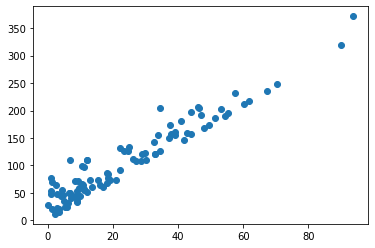

In [8]:
x_list, y_list = gen_sample_data()

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_list, y_list)
plt.show()

In [9]:
def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = len(x_list)
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size) #随机抽取batch_size个样本的索引值
        batch_x = [x_list[j] for j in batch_idxs]
        batch_y = [gt_y_list[j] for j in batch_idxs]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        print('w:{0},b:{1}'.format(w,b))
        print('loss is {}'.format(eval_loss(w,b,x_list,gt_y_list)))
        time.sleep(0.1)
        
    return w,b

In [10]:
train(x_list, y_list, 100, 0.001, 100)

w:4.795808150847796,b:0.11270900419290789
loss is 701.3491984000283
w:4.2578215623405935,b:0.10814915845929386
loss is 406.77500505822564
w:3.972734711567308,b:0.11432678337487605
loss is 363.8807218700691
w:3.9659246249973776,b:0.12418564979480294
loss is 363.6995193047885
w:3.8599550675486425,b:0.13167467835479812
loss is 368.3344196369074
w:3.9444158882973177,b:0.1439786106730469
loss is 363.54107843604214
w:3.9509156377502372,b:0.15581407546269327
loss is 363.32713175626077
w:3.9377121738297154,b:0.16593642467025607
loss is 363.3822387230064
w:3.9633417906211883,b:0.17830807750705915
loss is 363.0435440292939
w:3.8250382655263593,b:0.18443320401131774
loss is 371.46953783048264
w:3.989811102746607,b:0.19864794168719369
loss is 363.29019038224453
w:3.9987946555470066,b:0.2138466592015519
loss is 363.4422320523268
w:4.009119063086539,b:0.22405755459723445
loss is 363.79919785197023
w:3.8740848539696624,b:0.2300482688653883
loss is 365.7089245219665
w:3.9841150912712924,b:0.2454351992

(4.057402839438624, 1.271040588061114)